# Zomato Data Analysis Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

# Convert the data type of column - rate

In [5]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0, 0.5, 'type of resturant')

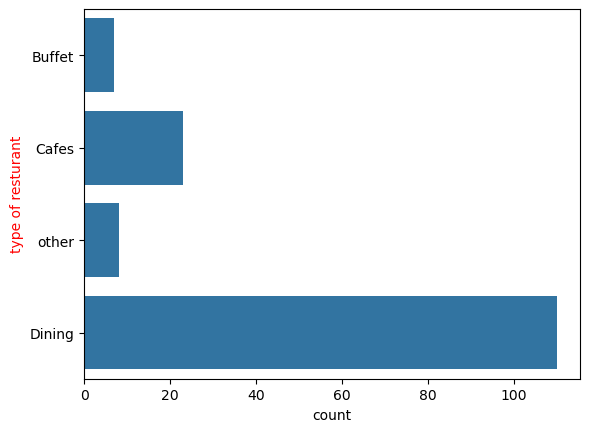

In [6]:
sns.countplot(y=dataframe['listed_in(type)'])
plt.ylabel("type of resturant",c="red",size = 10)

conclusion - majority of the resturant fall in dinning category

Text(0, 0.5, 'votes')

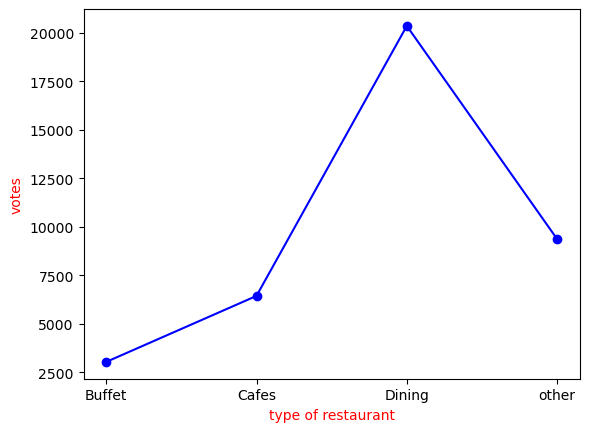

In [7]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
plt.plot(grouped_data, c = "blue", marker="o")
plt.xlabel("type of restaurant", c = "red", size = 10)
plt.ylabel("votes", c = "red", size = 10)

Conclusin - Dinning restauran has received maxium votes

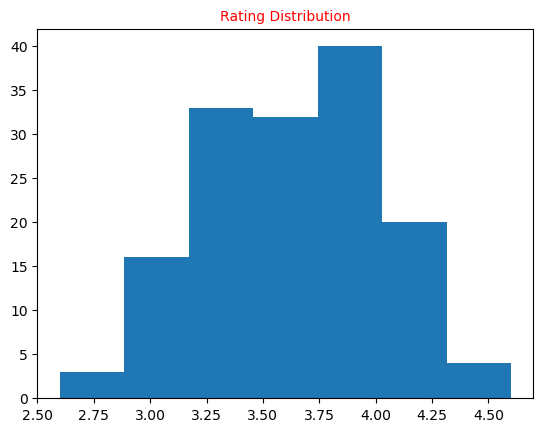

In [39]:
plt.hist(x=dataframe["rate"], bins=7)
plt.title("Rating Distribution",c = "red", size = 10)
plt.show()

Conclusion - the majority  of resturant received rating from 3.5 to 4.0

In [41]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

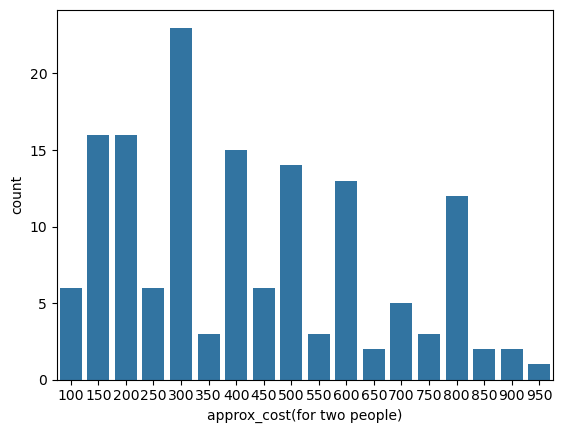

In [43]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion - the majority of couples prefer resturant with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

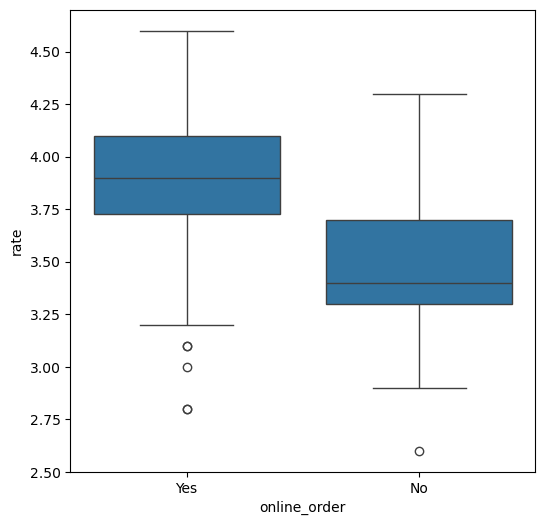

In [48]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = dataframe)

Conclusion - Offline order received lower rating in comparison to online order

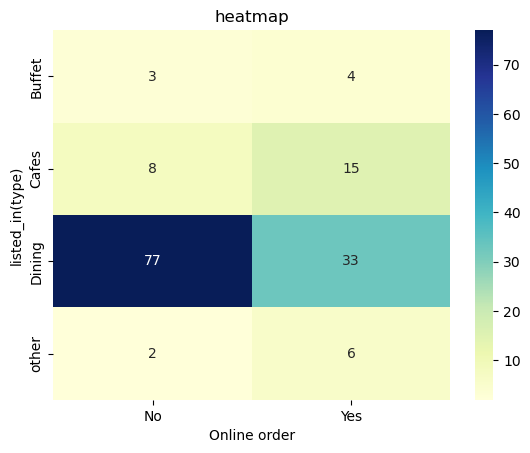

In [12]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('heatmap')
plt.xlabel('Online order')
plt.ylabel('listed_in(type)')
plt.show()

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.